#**TASK 2 - Convolutional Neural Networks**


1. Vania Oliveira - 10607174

**Course Title:** MSc in Data Analytics

**Lecturer Name:** Courtney Ford

**Module/Subject Name:** Machine Learning and Pattern Recognition

**Assignment Title:** CA_TWO Task 2

Importing necessary library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16
from sklearn.metrics import confusion_matrix, classification_report
tf.__version__

'2.12.0'

#**Importing the Dataset**

First we uploaded the images to Google drive folder. After that, we connect Google Drive and Google Colab through the from *google.colab import drive* library. In this way we have access to the content of Google Drive.

In [ ]:
from google.colab import drive #code for connect colab with drive
drive.mount('/content/drive')

Mounted at /content/drive


For splitting the data between training and testing we use the following extra package:

**!pip install split-folders**

In this way, the entire dataset was divided into 80/20

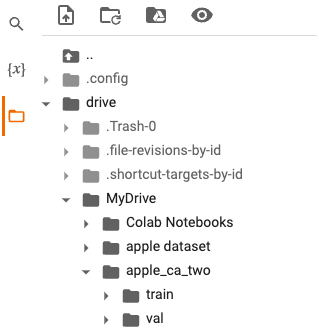

The training and test folders appear inside google drive in the path we specified. Upon running, Colab will request for permission to access the dataset and proceed with the input file. Here, we let Colab access the input dataset and mount it from Drive. The code will then create a folder to save the output. We are splitting the datasets into training and test sets in an 80/20 ratio.

In [ ]:
!pip install split-folders

import splitfolders
input_folder = "/content/drive/MyDrive/B9DA109_CA2_Task2" #path of your input dataset
output = "/content/drive/MyDrive/apple_ca_two" #where you want the split datasets saved

splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.8, .2,)) # ratio of split are in order of train/test.

Copying files: 5002 files [55:28,  1.50 files/s]


# **Pre-processing and Data Augmentation of the image dataset**

We use *ImageDataGenerator* to process images where we are using:

*   rescale - to normalize pixel values.
*   rotation_range - to subtly rotate the image creating new images and thus increasing our database.
*   horizontal_flip - to rotate the image horizontally.
*   zoom_range - to zoom the image also creating new image possibilities for our dataset.









In [ ]:
#creating train dataset
datagen_train = ImageDataGenerator(rescale=1./255,
                             rotation_range = 7,
                             horizontal_flip = True,
                             zoom_range = 0.2)


In this part, we apply the parameters previously established for the treatment of images to our training data. Note that as part of the division made by *splitfolders* we now have our data separated into two different folders and for that reason we have to pass the corresponding path from the training and testing folders to our variables **data_train and data_test**

In [ ]:
#Load images
data_train = datagen_train.flow_from_directory('/content/drive/MyDrive/apple_ca_two/train',   #path for train folder
                                         target_size = (64, 64),
                                         batch_size = 64,
                                         class_mode = 'categorical',
                                         shuffle = True)

#geting imagens and labels separately
image_train = data_train[0][0]
label_train = data_train[0][1]

Found 3997 images belonging to 10 classes.


For the test images we use less parameters, as there is no need to create new images, as the idea is to keep them in their normal form, which is as close to the real images that can be used in our model.

In [ ]:
#creating test dataset
datagen_test = ImageDataGenerator(rescale=1./255)

#Load images
data_test = datagen_test.flow_from_directory('/content/drive/MyDrive/apple_ca_two/val',
                                        target_size = (64, 64),
                                        batch_size = 64,
                                        class_mode = 'categorical',
                                        shuffle = False)

image_test = data_test[0][0]
label_test = data_test[0][1]

Found 1005 images belonging to 10 classes.


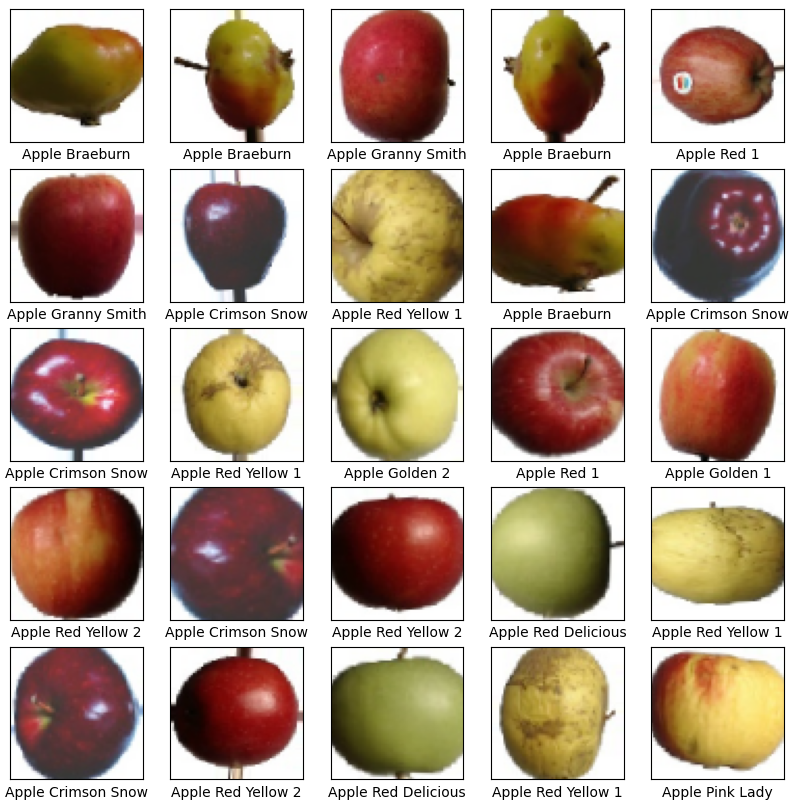

In [ ]:
#taking a look at the examples of the images we have
class_names = ['Apple Red Yellow 2', 'Apple Granny Smith', 'Apple Red Yellow 1', 'Apple Golden 2', 'Apple Red Delicious', 'Apple Golden 1', 'Apple Red 1', 'Apple Crimson Snow', 'Apple Pink Lady', 'Apple Braeburn']

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image_train[i])
    plt.xlabel(class_names[np.argmax(label_train[i])])
plt.show()

# **Convolutional Neural Network - CNN**

Here we start the construction of our Convolutional Neural Network model.

The first step is to use the *Sequential*( ) function that allows the data to flow in a single direction (from input to output) passing through each of the layers.

We start with adding the Convolutional layers (CONV2D) that form the core of the CNN model. These include *filters* which are the number of feature detectors we want to use or *kernel_size* which is equivalent to the size of the feature detector that will go through our images.
After each convolutional layer, an activation function, like RELU is applied to the feature maps that were extracted from the filters.

*   *activation* - 'relu' 'is the most suitable activation function for our use case(10 categories). However, if we had a binary dataset we could use the 'sigmoid' function.

*   *input_shape* - which receives as values the size of the images (64, 64) plus the value 3 referring to the colors of our images (three RGB channels). Remembering that the dimensions of the database images must be the same for our model.

Pooling layers reduces the spatial dimensions of features and helps overfitting along with reducing complexity of the images. We used a common pooling which is the MaxPooling for our model.

*   *MaxPooling* - is the traversal of the pixels of the image, selecting only the most important parts, generating a summarized version of the image containing only the most significant parts.

*   *Flatten* layer converts the feature maps from matrices to vectors which are then fed to the fully connected layers.

Finally, the fully connected layers are responsible for binding everything the model has learnt, combining the results from the previous layers together and making the final classification decision.

*   *Dense* - The dense layer is a "fully connected" layer that takes all neurons from the previous layer and connects each of them to all neurons in the dense layer. This full connection allows the combined information from previous layers to be used to make final decisions about output classes or values.

*   *units* - number of neurons we will have in our dense layer.

This value can be calculated as follows:
Flatten value added to the number of classes we have in our dataset and then divided by the number of classes (in our case 10)

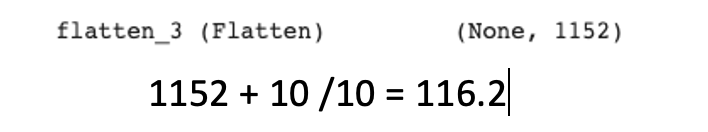

*   *activation='softmax'* - has the function of converting the outputs of the last dense layer (fully connected) into a probability distribution over several exclusive classes.





In [ ]:
#CNN with 3 layers
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(units=116, activation='relu'))
model.add(Dropout(0.5))  # Add dropout to reduce overfitting
model.add(Dense(units=10, activation='softmax')) #units = 10 which means an output neuron for each of the classes we have

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0

Here we train the model. After defining our neural network, we have to compile it applying some parameters: We use the optimizer 'adam'; loss 'categorical_crossentropy', as we have a categorical problem; and 'accuracy' metrics.

In [ ]:
# Compile and train the neural network
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Here we start training our model with a batch_size of 64 which means the amount of images that we are going to send per epochs. We also define 10 epochs.
We see a validation accuracy of 90% for the first 9 epochs and notice that for the 10th epoch, accuracy is a 100%. The model is not learning anything new from the images beyond this and so we have stopped fitting it beyond 10 epochs.

In [ ]:
batch_size = 64
epochs = 10
history = model.fit(data_train, epochs=epochs, batch_size=batch_size, validation_data= data_test)

Epoch 1/10
63/63 [==============================] - 37s 356ms/step - loss: 1.3616 - accuracy: 0.5001 - val_loss: 0.5722 - val_accuracy: 0.7791
Epoch 2/10
63/63 [==============================] - 14s 220ms/step - loss: 0.4140 - accuracy: 0.8546 - val_loss: 0.1537 - val_accuracy: 0.9592
Epoch 3/10
63/63 [==============================] - 13s 211ms/step - loss: 0.2740 - accuracy: 0.9074 - val_loss: 0.2055 - val_accuracy: 0.9413
Epoch 4/10
63/63 [==============================] - 14s 216ms/step - loss: 0.1821 - accuracy: 0.9405 - val_loss: 0.0107 - val_accuracy: 1.0000
Epoch 5/10
63/63 [==============================] - 15s 237ms/step - loss: 0.1254 - accuracy: 0.9567 - val_loss: 0.2015 - val_accuracy: 0.9294
Epoch 6/10
63/63 [==============================] - 13s 210ms/step - loss: 0.1097 - accuracy: 0.9617 - val_loss: 0.0279 - val_accuracy: 0.9881
Epoch 7/10
63/63 [==============================] - 14s 215ms/step - loss: 0.0711 - accuracy: 0.9777 - val_loss: 0.0073 - val_accuracy: 0.9990

Visualizing our training and testing results:

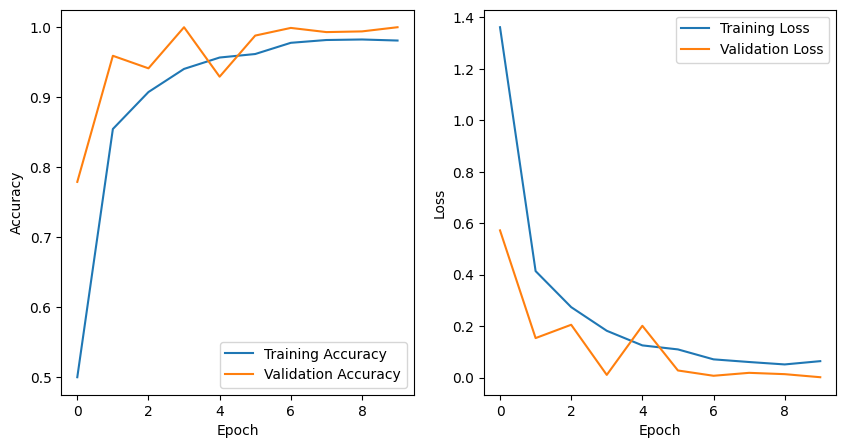

In [ ]:
# Plot training and validation loss and accuracy
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In this step we check the *loss*, as well as perform the *prediction* on the test dataset. For a better evaluation of the generated results, we printed the *classification report*.

In [ ]:
test_loss, test_acc = model.evaluate(image_test, label_test)
print(f'Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}')

2/2 [==============================] - 0s 10ms/step - loss: 0.0044 - accuracy: 1.0000
Test loss: 0.0044, Test accuracy: 1.0000


In [ ]:
prediction = model.predict(data_test)
prediction

16/16 [==============================] - 2s 100ms/step


array([[9.9997985e-01, 1.7487159e-13, 3.9296317e-20, ..., 1.2453375e-12,
        2.4602260e-13, 4.2499652e-13],
       [9.9998820e-01, 3.9141344e-13, 7.6068259e-20, ..., 1.0103676e-12,
        1.8860919e-13, 1.9765706e-12],
       [9.9998701e-01, 3.9280929e-13, 8.4535144e-20, ..., 1.1581631e-12,
        2.2966224e-13, 1.6384826e-12],
       ...,
       [2.4717472e-17, 9.0089977e-21, 7.9326164e-17, ..., 3.7866390e-21,
        4.9022257e-26, 1.0000000e+00],
       [6.8524353e-12, 5.6449350e-15, 1.1304414e-15, ..., 1.3854202e-16,
        1.3522670e-19, 1.0000000e+00],
       [1.5873945e-10, 1.8130444e-14, 3.1177025e-15, ..., 6.4061187e-16,
        8.7751383e-19, 1.0000000e+00]], dtype=float32)

In [ ]:
m_pred = np.argmax(prediction, axis=1)
m_true = data_test.classes

In [ ]:
print(classification_report(m_true, m_pred, target_names=class_names))

                     precision    recall  f1-score   support

 Apple Red Yellow 2       1.00      1.00      1.00        99
 Apple Granny Smith       1.00      1.00      1.00        89
 Apple Red Yellow 1       1.00      1.00      1.00        96
     Apple Golden 2       1.00      1.00      1.00        99
Apple Red Delicious       1.00      1.00      1.00        99
     Apple Golden 1       1.00      1.00      1.00        92
        Apple Red 1       1.00      1.00      1.00        99
 Apple Crimson Snow       1.00      1.00      1.00        98
    Apple Pink Lady       1.00      1.00      1.00        99
     Apple Braeburn       1.00      1.00      1.00       135

           accuracy                           1.00      1005
          macro avg       1.00      1.00      1.00      1005
       weighted avg       1.00      1.00      1.00      1005



We can see that around epoch 9 our model shows the best results. After that we reached the accuracy of 1.0. Our model is able to classify the images correctly.





# **TRANSFER LEARNING**

Transfer learning is nothing more than using a neural network already trained on a large dataset. The idea is to use part of the weights and training already carried out, transferring part of this information to our model. This way it is only necessary to adjust the head (final layers).

We have used *VGG16* model here, which is a convolutional neural network architecture in which training was done using the ImageNet database. We chose this model because we can use as many classes as necessary according to the needs of our dataset. In this case we have 10 classes.

References:
*   ImageNet - https://www.image-net.org/

*   VGG16 - https://arxiv.org/abs/1409.1556

*   Documentation - https://keras.io/api/applications/

In [ ]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

553467096/553467096 [==============================] - 29s 0us/step


Here we pass new dimensions to the images since it is necessary that our images have the same size as the images that were used in the chosen model for Transfer Learning

In [ ]:
datagen_train = ImageDataGenerator(rescale=1./255,
                             rotation_range = 7,
                             horizontal_flip = True,
                             zoom_range = 0.2)

data_train = datagen_train.flow_from_directory('/content/drive/MyDrive/apple_ca_two/train',   #path for train folder
                                         target_size = (224, 224),    #new dimensions matching with VGG16
                                         batch_size = 64,
                                         class_mode = 'categorical',
                                         shuffle = True)

#geting imagens and labels separately
image_train = data_train[0][0]
label_train = data_train[0][1]

Found 3997 images belonging to 10 classes.


In [ ]:
datagen_test = ImageDataGenerator(rescale=1./255)

#Load images
data_test = datagen_test.flow_from_directory('/content/drive/MyDrive/apple_ca_two/val',
                                        target_size = (224, 224),
                                        batch_size = 64,
                                        class_mode = 'categorical',
                                        shuffle = False)

image_test = data_test[0][0]
label_test = data_test[0][1]

Found 1005 images belonging to 10 classes.


To connect one model to the other, it is necessary to follow some steps, such as checking the model that we are going to use; check the output layers to know how we are going to make the connection between them; and freeze the weights of the chosen model to transfer them to our model.

In [ ]:
#checking how the network look like
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Since the VGG16 model is well trained due to its large amount and variety of images, we will remove only the last layer, replacing it with a dense layer of 10 units, referring to the number of classes we have in our model

In [ ]:
#Freezing the pre-trained layers to avoid overfitting
for layer in vgg16_model.layers:
    layer.trainable = False

We have created a new model for Transfer learning purposed and will be adding the layers from the VGG16 model on top of this model. We have kept the first model (already trained on the apple dataset separately as we wanted to build it for our learning purpose)

In [ ]:
#Creating a new model
model_tl = Sequential()

We add all the layers from the VGG16 model, these will already have the pre-defined weights from the Imagenet dataset which we will use to train on our apple dataset after tweaking the Bottom layer.

In [ ]:
#removing the last layer
for layer in vgg16_model.layers[:-1]:
  model_tl.add(layer)

In [ ]:
#checking the changes
model_tl.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [ ]:
#Adding Droput and the last output layer
model_tl.add(Dropout(0.5))
model_tl.add(Dense(units=10, activation='softmax'))

In [ ]:
#checking if everthing is okay
model_tl.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

Training the new model having transferred its previous learning along with new bottom layers for our dataset

In [ ]:
model_tl.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

Fitting this new model that we have transferred the learning on with our apple dataset

In [ ]:
#training of the new model following the same parameters previously applied
history_tl = model_tl.fit(data_train, epochs=epochs, batch_size=batch_size, validation_data= data_test)

Epoch 1/10
63/63 [==============================] - 80s 1s/step - loss: 2.3506 - accuracy: 0.2377 - val_loss: 1.4213 - val_accuracy: 0.6667
Epoch 2/10
63/63 [==============================] - 63s 1s/step - loss: 1.6942 - accuracy: 0.4106 - val_loss: 1.0564 - val_accuracy: 0.6985
Epoch 3/10
63/63 [==============================] - 62s 983ms/step - loss: 1.3501 - accuracy: 0.5269 - val_loss: 0.9086 - val_accuracy: 0.7781
Epoch 4/10
63/63 [==============================] - 63s 998ms/step - loss: 1.1503 - accuracy: 0.5974 - val_loss: 0.9365 - val_accuracy: 0.7134
Epoch 5/10
63/63 [==============================] - 63s 997ms/step - loss: 1.0032 - accuracy: 0.6612 - val_loss: 0.6681 - val_accuracy: 0.8269
Epoch 6/10
63/63 [==============================] - 62s 987ms/step - loss: 0.9240 - accuracy: 0.6833 - val_loss: 0.6646 - val_accuracy: 0.7871
Epoch 7/10
63/63 [==============================] - 61s 970ms/step - loss: 0.8365 - accuracy: 0.7210 - val_loss: 0.5883 - val_accuracy: 0.8398
Epoch

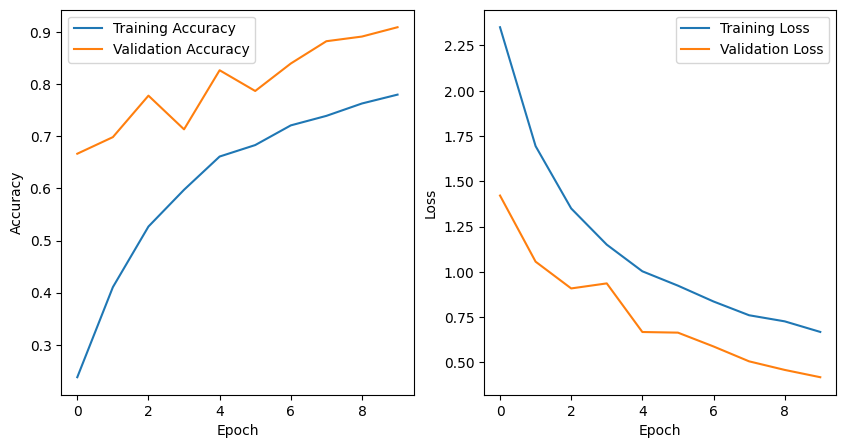

In [ ]:
# Plot training and validation loss and accuracy after use Transfer Learning
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history_tl.history['accuracy'], label='Training Accuracy')
plt.plot(history_tl.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_tl.history['loss'], label='Training Loss')
plt.plot(history_tl.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model_tl.evaluate(image_test, label_test)
print(f'Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}')

2/2 [==============================] - 5s 132ms/step - loss: 0.6683 - accuracy: 0.9531
Test loss: 0.6683, Test accuracy: 0.9531


In [ ]:
prediction_1 = model_tl.predict(data_test)
prediction_1

16/16 [==============================] - 4s 256ms/step


array([[5.0230110e-01, 8.2937166e-02, 9.9816978e-05, ..., 1.4183045e-02,
        4.9848384e-03, 5.3515483e-04],
       [6.1478657e-01, 9.2473656e-02, 2.3843955e-04, ..., 1.8366206e-02,
        8.8508790e-03, 2.8859845e-03],
       [6.1886692e-01, 8.9078404e-02, 1.3501474e-04, ..., 1.4335920e-02,
        5.7225074e-03, 1.3494620e-03],
       ...,
       [3.2804648e-03, 5.7802645e-05, 5.7049725e-02, ..., 1.1780742e-03,
        2.9467670e-03, 9.0724629e-01],
       [8.0410327e-04, 3.0464193e-05, 2.3274156e-04, ..., 7.2503067e-04,
        1.8117946e-04, 9.9502242e-01],
       [1.6293557e-03, 8.8274785e-05, 1.7039313e-04, ..., 2.4970185e-03,
        4.8228196e-04, 9.8793435e-01]], dtype=float32)

In [ ]:
m_pred_1 = np.argmax(prediction_1, axis=1)
m_true_1 = data_test.classes

In [ ]:
print(classification_report(m_true_1, m_pred_1, target_names=class_names))

                     precision    recall  f1-score   support

 Apple Red Yellow 2       0.68      0.83      0.75        99
 Apple Granny Smith       0.86      1.00      0.93        89
 Apple Red Yellow 1       1.00      0.99      0.99        96
     Apple Golden 2       0.88      0.98      0.93        99
Apple Red Delicious       0.80      1.00      0.89        99
     Apple Golden 1       1.00      0.71      0.83        92
        Apple Red 1       1.00      0.83      0.91        99
 Apple Crimson Snow       1.00      0.99      0.99        98
    Apple Pink Lady       1.00      0.74      0.85        99
     Apple Braeburn       1.00      1.00      1.00       135

           accuracy                           0.91      1005
          macro avg       0.92      0.91      0.91      1005
       weighted avg       0.92      0.91      0.91      1005



After applying the Transfer Learning technique, we can observe that the best results for this model appear around 9 epoch (lower loss; good difference between training and test accuracy). In the classification report it is possible to notice that some of the categories have 1.00 of precision, which is not ideal, but compared with the previous model we have more satisfactory results.


# **FINE TUNING**

Fine Tuning is a technique where we can unfreeze the top layers of our transfer learning model to use the layers having the pre-defined weights for our own dataset for optimal classification.

We start this process by first checking the trainable and frozen layers in our transfer learning model and then unfreezing all layers by setting *model_tl trainable to True*. Then we check if this modification has occurred. We use *len* to find out how many layers we have (in this case 23 layers) and then we decide to keep 14 of them frozen and we're going to train our model with the now unfrozen layers on the apple dataset again.


In [ ]:
#Checking the trainable and non-trainable layers we defined in our transfer learning model. We can see that only the Dropout and Dense layers are trainable as we added them
for layer in model_tl.layers:
  print(layer, layer.trainable)

<keras.layers.convolutional.conv2d.Conv2D object at 0x7c08081d3e50> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7c080b96bd30> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7c08081a8b80> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7c08081abeb0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7c08081aa440> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7c08081aab90> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7c08081d1a80> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7c085b2d33d0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7c080b9fef50> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7c0808181d50> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7c080b9fe050> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7c080b969ed0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7c08081d3010> False
<keras.layers.poo

We update all layers to Trainable so we can use some of the pre-trained layers

In [ ]:
model_tl.trainable = True

Checking the length of layers in our Model

In [ ]:
len(model_tl.layers)

23

Defining the fine tuning value as 14 and then freezing them back

In [ ]:
fine_tuning_at = 14

In [ ]:
#here we freezing the first 14 layers
for layer in model_tl.layers[:fine_tuning_at]:
  layer.trainable = False

In [ ]:
#Checking if the parameters are now 14 False and 9 True
for layer in model_tl.layers:
  print(layer, layer.trainable)

<keras.layers.convolutional.conv2d.Conv2D object at 0x7c08081d3e50> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7c080b96bd30> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7c08081a8b80> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7c08081abeb0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7c08081aa440> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7c08081aab90> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7c08081d1a80> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7c085b2d33d0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7c080b9fef50> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7c0808181d50> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7c080b9fe050> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7c080b969ed0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7c08081d3010> False
<keras.layers.poo

In [ ]:
#Rechecking the summary
model_tl.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

Re-training our model with the newly unfrozen layers

In [ ]:
model_tl.compile(optimizer='Adam', loss= 'categorical_crossentropy', metrics = ['accuracy'])

Fitting this new learned model with our apple dataset. We can see that as it iterates through each epoch, the model is able to learn much better

In [ ]:
history_ft = model_tl.fit(data_train, epochs=epochs, batch_size=batch_size, validation_data= data_test)

Epoch 1/10
66/66 [==============================] - 69s 1s/step - loss: 1.9532 - accuracy: 0.6059 - val_loss: 1.4741 - val_accuracy: 0.7474
Epoch 2/10
66/66 [==============================] - 66s 1s/step - loss: 1.1856 - accuracy: 0.7071 - val_loss: 0.8037 - val_accuracy: 0.7331
Epoch 3/10
66/66 [==============================] - 66s 1s/step - loss: 0.8602 - accuracy: 0.7083 - val_loss: 0.5332 - val_accuracy: 0.8205
Epoch 4/10
66/66 [==============================] - 66s 1s/step - loss: 0.7800 - accuracy: 0.7240 - val_loss: 0.5586 - val_accuracy: 0.7873
Epoch 5/10
66/66 [==============================] - 66s 994ms/step - loss: 0.7231 - accuracy: 0.7388 - val_loss: 0.5493 - val_accuracy: 0.7635
Epoch 6/10
66/66 [==============================] - 66s 989ms/step - loss: 0.7001 - accuracy: 0.7474 - val_loss: 0.3706 - val_accuracy: 0.8794
Epoch 7/10
66/66 [==============================] - 67s 1s/step - loss: 0.7420 - accuracy: 0.7295 - val_loss: 0.6072 - val_accuracy: 0.7151
Epoch 8/10
66/

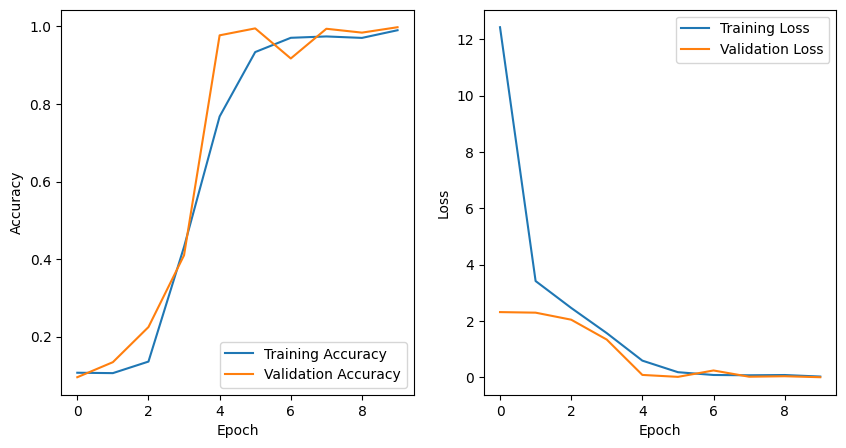

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history_ft.history['accuracy'], label='Training Accuracy')
plt.plot(history_ft.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_ft.history['loss'], label='Training Loss')
plt.plot(history_ft.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model_tl.evaluate(image_test, label_test)
print(f'Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}')

2/2 [==============================] - 0s 143ms/step - loss: 0.0044 - accuracy: 1.0000
Test loss: 0.0044, Test accuracy: 1.0000


In [ ]:
prediction_2 = model_tl.predict(data_test)
prediction_2

16/16 [==============================] - 4s 270ms/step


array([[9.9728811e-01, 5.3025557e-05, 5.7736378e-07, ..., 4.2158896e-07,
        4.3706579e-05, 1.2986023e-07],
       [9.9924469e-01, 3.2680568e-05, 1.0373493e-07, ..., 1.8057942e-07,
        4.5569261e-05, 3.9519602e-08],
       [9.9790776e-01, 4.0431238e-05, 5.9771338e-07, ..., 3.4175073e-07,
        6.5191096e-05, 1.1428029e-07],
       ...,
       [1.1896639e-10, 3.6473472e-13, 1.0373940e-10, ..., 2.4401348e-07,
        2.5801839e-12, 9.9870992e-01],
       [9.0078162e-13, 1.4785049e-15, 1.4125993e-13, ..., 7.7056796e-08,
        1.6462241e-14, 9.9998295e-01],
       [6.9610241e-11, 1.6995311e-13, 3.5569828e-12, ..., 1.0979045e-06,
        1.0588481e-12, 9.9991393e-01]], dtype=float32)

In [ ]:
m_pred_2 = np.argmax(prediction_2, axis=1)
m_true_2 = data_test.classes

In [ ]:
print(classification_report(m_true_2, m_pred_2, target_names=class_names))

                     precision    recall  f1-score   support

 Apple Red Yellow 2       1.00      1.00      1.00        99
 Apple Granny Smith       0.99      1.00      0.99        89
 Apple Red Yellow 1       1.00      1.00      1.00        96
     Apple Golden 2       1.00      1.00      1.00        99
Apple Red Delicious       0.99      1.00      0.99        99
     Apple Golden 1       1.00      0.99      0.99        92
        Apple Red 1       1.00      1.00      1.00        99
 Apple Crimson Snow       1.00      1.00      1.00        98
    Apple Pink Lady       1.00      1.00      1.00        99
     Apple Braeburn       1.00      0.99      1.00       135

           accuracy                           1.00      1005
          macro avg       1.00      1.00      1.00      1005
       weighted avg       1.00      1.00      1.00      1005



With the application of Fine Tuning, we see the results are much better for our transfer learning model. For a huge model like CNN, we have a relatively small input dataset and so our models are able to train on the images with a small epoch and batch size. Here accuracy 1 would mean the model is able to classify the images correctly.